In [2]:
from  glob import glob
import json
from  pathlib import Path
import matplotlib.pyplot  as plt

In [3]:
fs = glob("./model_works/*/*/*.json")

In [5]:
len(fs)

82

In [66]:
datasets = ['labeled_data','harvey','imgs8']
datasets = ['harvey']
models = []
models_info= []

for json_f  in fs[:]:
    if Path(json_f).exists():
        with open(json_f,'r') as f:
            model_config = json.load(f)
            data_root = model_config['data']['path']
            dataname = data_root.split('/')[-1]
            if len(dataname)==0:
                dataname = data_root.split('/')[-2]
            # print(dataname,data_root)
            if dataname in datasets:
                model_name = model_config['model']
                if model_name in models or len(models)==0:
                    print(model_config['model'],json_f)
                    txt_p = json_f.replace('model_config.json','log.txt')
                    if Path(txt_p).exists():
                        with open(txt_p,'r') as f:
                            lines = f.readlines()
                    print('train epoch: ',len(lines))
                    if len(lines)<100: continue
                    models_info.append({'model_name': model_config['model'],'config_path':Path(json_f).absolute().as_posix(),'train_epoch':len(lines),'model_config':model_config})
                    
           

bisenetv2 ./model_works/bisenetv2/bisenetv2_2024_01_24_01_58_14/model_config.json
train epoch:  158
resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512 ./model_works/resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512/resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512_2024_01_24_13_07_01/model_config.json
train epoch:  16
erfnet_fcn ./model_works/erfnet_fcn/erfnet_fcn_2024_01_30_02_34_55/model_config.json
train epoch:  200
erfnet_fcn ./model_works/erfnet_fcn/erfnet_fcn_2024_02_04_00_12_56/model_config.json
train epoch:  200
erfnet_fcn ./model_works/erfnet_fcn/erfnet_fcn_2024_02_04_18_20_36/model_config.json
train epoch:  200
erfnet_fcn ./model_works/erfnet_fcn/erfnet_fcn_2024_02_04_18_28_30/model_config.json
train epoch:  200
danet_r50-d8 ./model_works/danet_r50-d8/danet_r50-d8_2024_01_24_16_37_01/model_config.json
train epoch:  165
vgg_unet ./model_works/vgg_unet/vgg_unet_2024_01_31_20_48_13/model_config.json
train epoch:  121
vgg_unet ./model_works/vgg_unet/vgg_unet_2024_02

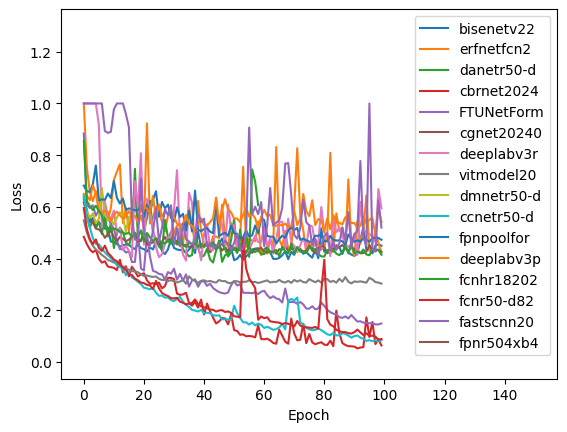

In [70]:
model_dic = {}
for model_config in models_info:
    # if 'use_ori_size' not in model_config['model_config']['data'].keys() or not model_config['model_config']['data']['use_ori_size']:
    #     continue
    json_f = model_config['config_path']
    txt_p = json_f.replace('model_config.json','log.txt')
    if Path(txt_p).exists():
        with open(txt_p,'r') as f:
            lines = f.readlines()
        vaules = []
        for line in lines[:]:
            vaules.append(line.split('val loss:')[-1].replace('\n',''))
        if len(vaules)>1:
            model_dic[json_f.split('/')[-2].replace('_','')] =  vaules

from scipy.interpolate import make_interp_spline


use_key = ['emanetr50-','vggunet202','UNetFormer']
# use_key = []
for k in model_dic:
    if k[:10] in use_key: continue
    use_key.append(k[:10])
    v = model_dic[k]
    x = [_ for _ in range(100)]
    y = []
    for yv in v[:100]:
        yv = float(yv)
        if yv >=1: 
            yv=1
        y.append(yv)
    plt.plot(x, y,label=k[:10])
    
plt.plot(0, 1.3)
plt.plot(150, 0)
# plt.title('折线图示例')
# plt.figure(figsize=(24,8))
plt.xlabel('Epoch')  
plt.ylabel('Loss') 
plt.legend() 

plt.savefig('test.png')

In [19]:
import  numpy as np